In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In this activity, we will explore the use of KMeans algorithm to perform image segmentation tasks. Image segmentation refers to a process in computer vision which partitions an image into multiple segments. Typically, grouping related pixels into meaningful parts makes it easiter for certain analysis purposes, such as segmenting and identifying a pedestrian for a self-driving car, a tumor for an automonous diagnostic system, etc.

<img src="data/image_segmentation.jpg" height=200>

Now, we are going to practice image segmentation of a celebrity headshot and create an art piece like the silkscreen painting by American pop artist Andy Warhol exhibited at the Museum of Modern Art, New York.

<img src="data/marilyn.jpg" width=400>

First, let's read in the pixels of a celebrity head at your choice.

array([[[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[247, 247, 249],
        [249, 249, 251],
        [249, 249, 251],
        ...,
        [243, 243, 245],
        [243, 243, 245],
        [245, 243, 246]],

       [[247, 247, 249],
        [249, 249, 251],
        [248, 248, 250],
        ...,
        [243, 243, 245],
        [243, 243, 245],
        [245, 243, 246]],

       [[247, 247, 249],
        [249, 249, 251],
        [248, 248, 250],
        ...,
        [243, 243, 245],
        [243, 243, 245],
        [245, 243, 246]]], dtype=uint8)
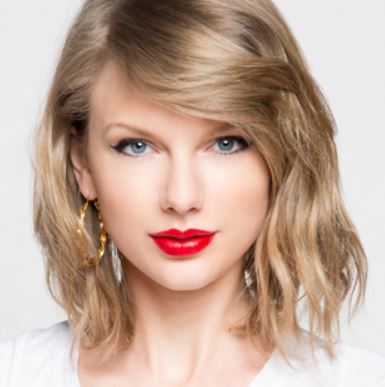

In [ ]:
img=plt.imread("WechatIMG131.jpeg")
img.shape

In general, we need to identify certain patches in the image and colorize them with random shades to generate our artwork. Patches could be generated by grouping together similar pixels. Let's grab all the pixels in the image and prepare them as the input for our clustering algorithm.

In [ ]:
x=img.reshape((-1,3))
x.shape

(148995, 3)

Import the KMeans model from sklearn, build the model by setting n_clusters (aka the k value) to the deemed group number (try a value from 3 to 5 first and vary it later so you can compare the results), and fit the model with data.

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=7)
model.fit(x)
colors=model.cluster_centers_
colors=colors.astype(int)

Extract the calculated centroids from the model, that is, the k mean colors around which all the pixels from the image center. Note that each value in the matrix is the average of various numbers so that they are float; we need to convert them into integers from 0 to 255.

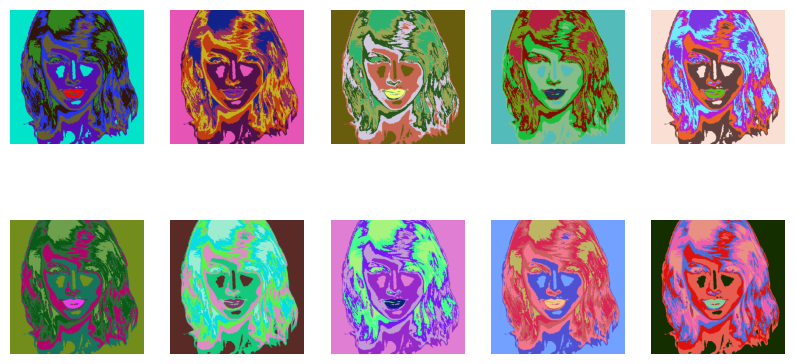

In [ ]:
a=model.predict(x)

fig,axs=plt.subplots(2,5,figsize=(10,5))
for i in range (2):
  for j in range(5):
    change_color=np.random.randint(0,256,(7,3))
    new_img=change_color[a]
    new_img=new_img.reshape(img.shape)
    axs[i,j].imshow(new_img)
    axs[i,j].set_axis_off()


Now get the group assignment for each pixel, replace it with the center color of the cluster it belongs to, and reconstruct the image to visualize it.

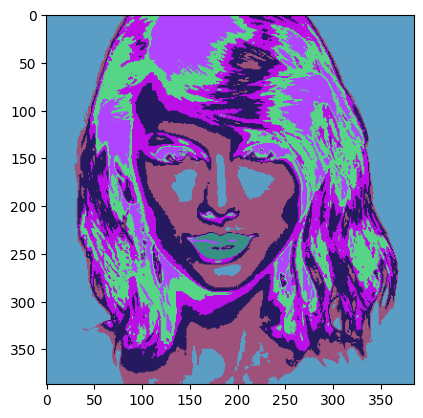

In [ ]:
a=a.reshape(img.shape)
plt.imshow(a)

Now you've completed the image segmentation part, feel free to fill those segments with certain colors (random or designated) to create your own masterpiece!

References

https://www.moma.org/collection/works/61239